In [622]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


In [623]:
# Mapping all non continious values to number
# WorkClass : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
def MapWorkclass(x):
    if x == "Private": return 5
    elif x == "Self-emp-inc": return 0
    elif x == "Federal-gov": return 2
    elif x == "Local-gov": return 4
    elif x == "State-gov": return 1
    elif x == "Without-pay": return 3
    else: return -1

# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 
# 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.    
def MapEducation(x):
    if x == "Some-college": return 0
    elif x == "Preschool": return 1
    elif x == "5th-6th": return 2
    elif x == "HS-grad": return 3
    elif x == "Masters": return 4
    elif x == "12th": return 5
    elif x == "7th-8th": return 6
    elif x == "Prof-school": return 7
    elif x == "1st-4th": return 8
    elif x == "Assoc-acdm": return 9
    elif x == "Doctorate": return 10
    elif x == "11th": return 11 
    elif x == "Bachelors": return 12
    elif x == "10th": return 13
    elif x == "Assoc-voc": return 14  
    elif x == "9th": return 15

#Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.    
def MapMaritalstatus(x):
    if x == "Divorced": return 4
    elif x == "Separated": return 3
    elif x == "Widowed": return 1
    elif x == "Never-married": return 5
    elif x == "Married-spouse-absent": return 0
    elif x == "Married-AF-spouse": return 6
    elif x == "Married-civ-spouse": return 2

# Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
# Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
def MapOccupation(x):
    if x == "Farming-fishing": return 1
    elif x == "Tech-support": return 2
    elif x == "Adm-clerical": return 3
    elif x == "Handlers-cleaners": return 4
    elif x == "Prof-specialty": return 5
    elif x == "Machine-op-inspct": return 6
    elif x == "Exec-managerial": return 7
    elif x == "Priv-house-serv": return 8
    elif x == "Craft-repair": return 9
    elif x == "Sales": return 10
    elif x == "Transport-moving": return 11
    elif x == "Armed-Forces": return 12
    elif x == "Other-service": return 13
    elif x == "Protective-serv": return 14



# Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
def MapRelationship(x):
    if x in ["Wife", "Husband"]: return 1
    elif x == "Own-child": return 5
    elif x == "Not-in-family": return 0
    elif x == "Other-relative": return 2
    elif x == "Unmarried": return 3


# White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
def MapRace(x):
    if x == "Amer-Indian-Eskimo": return 4
    elif x == "White": return 3
    elif x == "Other": return 2
    elif x == "Asian-Pac-Islander": return 1
    elif x == "Black": return 0

# Female, Male    
def MapSex(x):
    if x == "Female": return 1
    elif x == "Male": return 0
    
def MapNativecountry(x):
    if x in ["United-States", "Cuba", "Poland", "Thailand", "Ecuador", "China", "South", "Scotland", "Greece", "Ireland", "Hungary"]: return 2
    elif x in ["India", "England", "Canada", "Germany", "Iran", "Philippines", "Cambodia", "Taiwan", "France", "Italy", "Japan", "Yugoslavia", "Hong"]: return 1
    else: return 3


In [624]:
# Mapping age values to bin
def MapAge(x):
    if (x>=0) and (x<20): return 1
    elif (x>=20) and (x<40): return 2
    elif (x>=40) and (x<60): return 3
    elif (x>=60) and (x<80): return 4
    else: return 5

# Mapping hours-per-weak
def MapHoursperweak(x):
    if (x>=0) and (x<20): return 1
    elif (x>=20) and (x<40): return 2
    elif (x>=40) and (x<60): return 3
    elif (x>=60) and (x<80): return 4
    elif (x>=80): return 5
    
# Mapping education num
def MapEducationNum(x):
    if (x>=0) and (x<9): return 1
    if (x>=9) and (x<15): return 2
    elif (x>=15) : return 3
    else: return 0

In [625]:
# Import data from source, convert to dataframe and clean data

# Import and convert to dataframe
df = pd.read_csv('./dataset/adult.data.txt', sep=", ", header=None, engine='python')

# Define columns of the dataframe
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]

# Get rid of rows that contain "?"
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']

# Sampling
below_50K = df[df["salary-range"] == "<=50K"].sample(n=7841)
above_50K = df[df["salary-range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['income'] = (df["salary-range"] == ">50K")*1
adultsMapData = df.copy()
adultsMapData['workclass'] = adultsMapData['workclass'].apply(MapWorkclass)
adultsMapData['education'] = adultsMapData['education'].apply(MapEducation)
adultsMapData['marital-status'] = adultsMapData['marital-status'].apply(MapMaritalstatus)
adultsMapData['occupation'] = adultsMapData['occupation'].apply(MapOccupation)
adultsMapData['relationship'] = adultsMapData['relationship'].apply(MapRelationship)
adultsMapData['race'] = adultsMapData['race'].apply(MapRace)
adultsMapData['sex'] = adultsMapData['sex'].apply(MapSex)
adultsMapData['native-country'] = adultsMapData['native-country'].apply(MapNativecountry)
adultsMapData['age'] = adultsMapData['age'].apply(MapAge)
adultsMapData['hours-per-week'] = adultsMapData['hours-per-week'].apply(MapHoursperweak)
adultsMapData['education-num'] = adultsMapData['education-num'].apply(MapEducationNum)
#df.head()


<AxesSubplot:xlabel='workclass'>

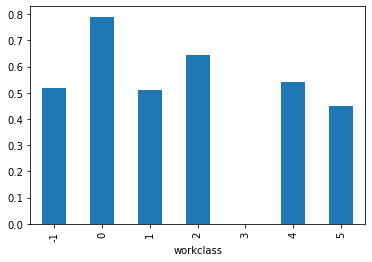

In [626]:
adultsMapData.groupby('workclass').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='education'>

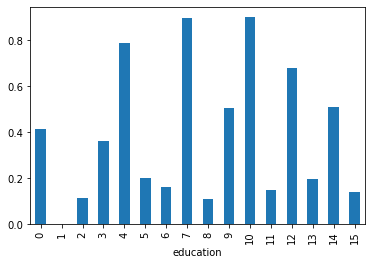

In [627]:
adultsMapData.groupby('education').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital-status'>

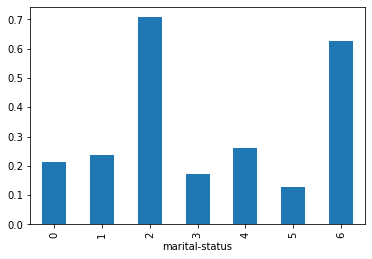

In [628]:
adultsMapData.groupby('marital-status').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

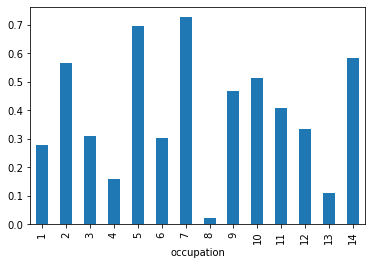

In [629]:
adultsMapData.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

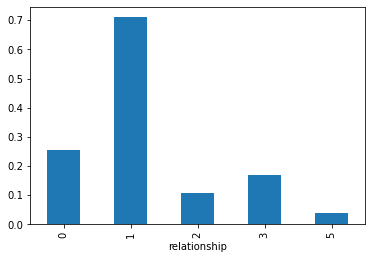

In [630]:
adultsMapData.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

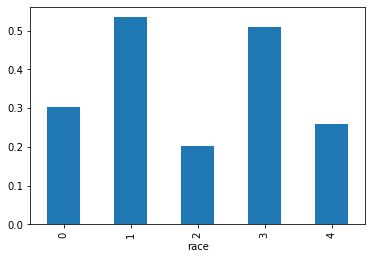

In [631]:
adultsMapData.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

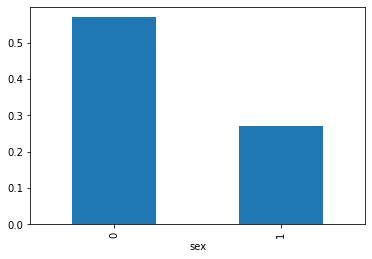

In [632]:
adultsMapData.groupby('sex').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='native-country'>

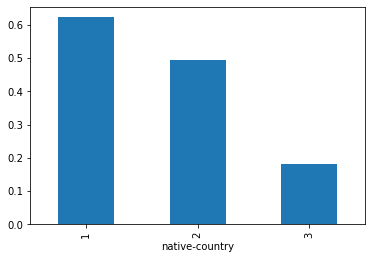

In [633]:
adultsMapData.groupby('native-country').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

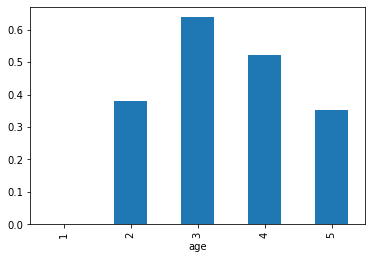

In [634]:
adultsMapData.groupby('age').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='hours-per-week'>

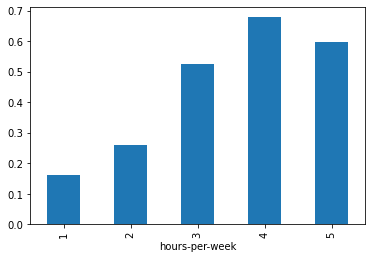

In [635]:
adultsMapData.groupby('hours-per-week').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='education-num'>

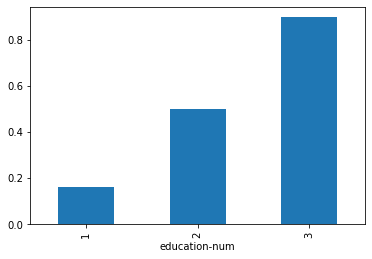

In [636]:
adultsMapData.groupby('education-num').income.mean().plot(kind='bar')

In [637]:
adultsMapData.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'salary-range'], axis=1, inplace=True)
adultsMapData.drop(['workclass', 'native-country', 'race'], axis=1, inplace=True)
#adultsMapDataNew = adultsMapData[['education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'marital-status', 'education']]
adultsMapData.head()

,age,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,income
7,3,3,2,2,7,1,0,3,1
8,2,4,2,5,5,0,1,3,1
9,3,12,2,2,7,1,0,3,1
10,2,0,2,2,7,1,0,5,1
11,2,12,2,2,5,1,0,3,1


In [638]:
X, Y = adultsMapData.iloc[:, :-1], adultsMapData.iloc[:, [-1]]
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train.fillna(X_train.mean())
X_test.fillna(X_test.mean())
#Scaling
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.24696716 0.14724472 0.13559269 0.12813193 0.09859583 0.0905448
 0.08334968 0.06957318]


In [639]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2337
           1       0.74      0.79      0.76      2268

    accuracy                           0.76      4605
   macro avg       0.76      0.76      0.76      4605
weighted avg       0.76      0.76      0.76      4605



In [640]:
# logistic regression
clf = LogisticRegression().fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2337
           1       0.73      0.83      0.78      2268

    accuracy                           0.76      4605
   macro avg       0.77      0.76      0.76      4605
weighted avg       0.77      0.76      0.76      4605



In [641]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      2337
           1       0.75      0.84      0.79      2268

    accuracy                           0.79      4605
   macro avg       0.79      0.79      0.79      4605
weighted avg       0.79      0.79      0.79      4605



In [642]:
# Finally for the MLP- Multilayer Perceptron
clf = MLPClassifier()  
clf = clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      2337
           1       0.75      0.85      0.80      2268

    accuracy                           0.79      4605
   macro avg       0.79      0.79      0.79      4605
weighted avg       0.79      0.79      0.79      4605



/opt/anaconda3/envs/CSE578/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
